In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def parse_filename(filename: str):
    """
    Возвращает количество вершин из имени файла
    """
    return int(filename.split('_')[1])

In [80]:
def draw_from_file(filename: str):
    method = ''
    if filename.endswith('ek.txt'):
        method = 'Edmonds-Karp'
    elif filename.endswith('pr.txt'):
        method = 'Push-Relabel'
    else:
        print(f"Название файла некорректно: {filename}")
        return
    file = open(filename, 'r')
    M_10 = {}
    M_10000 = {}
    time_10 = []
    time_10000 = []
    line = file.readline()
    while line:
        n, m, u, time = line.split()
        n = int(n)
        #m = int(m)
        u = int(u)
        time = float(time)
        if u == 10:
            M_10[m] = float(time)
            time_10.append(int(time))
            
        elif u == 10000:
            M_10000[m] = float(time)
            time_10000.append(float(time))
        line = file.readline()
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes[0].bar(M_10.keys(), M_10.values())
    axes[1].bar(M_10000.keys(), M_10000.values())
    print(M_10)
    print(M_10000)
    fig.set_label('asd')
    fig.suptitle(f"Тест методом {method}, n={n}")
    fig.supxlabel('m')
    fig.supylabel('Время')
    
    plt.show()

{'990': 33.7208349609375, '1237': 59.9800146484375, '1650': 102.9608935546875, '2475': 168.351416015625, '4950': 737.9800830078125}
{'990': 31.50482421875, '1237': 62.676259765625, '1650': 110.016025390625, '2475': 199.1146533203125, '4950': 706.0248828125}


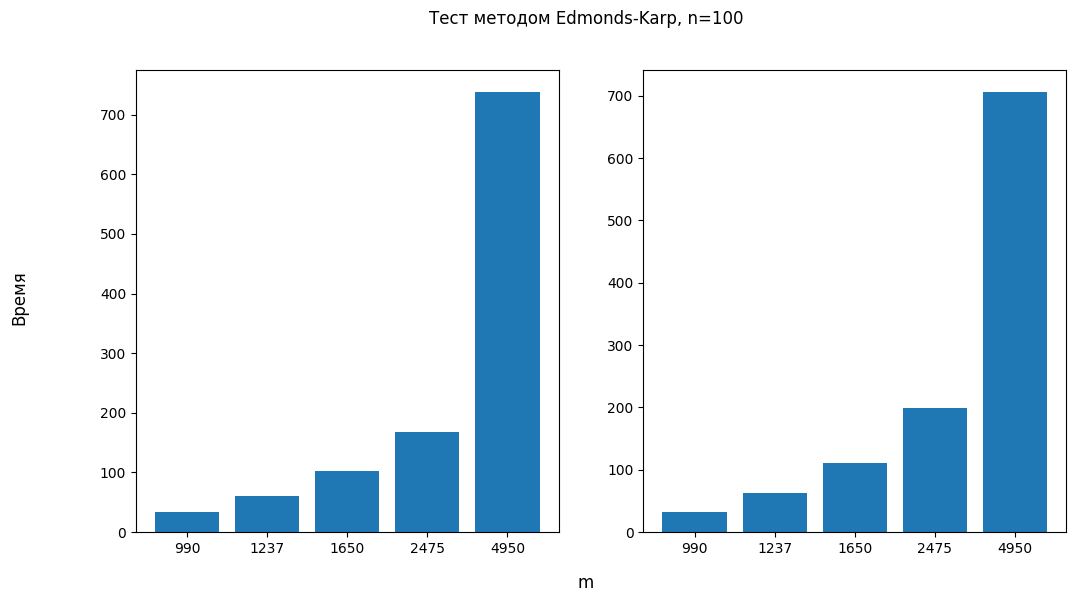

In [81]:
draw_from_file('test_results/test_100_ek.txt')

In [ ]:
def draw_comparison(filename1: str, filename2: str):
    method = ''
    if not filename1.endswith('ek.txt') and filename2.endswith('pr.txt'):
        print('Первый аргумент - файл Edmond-Karp, второй - Push-Relabel')
        return
    file = open(filename1, 'r')
    ek_10 = {}
    ek_10000 = {}
    
    line = file.readline()
    while line:
        n, m, u, time = line.split()
        n = int(n)
        #m = int(m)
        u = int(u)
        time = float(time)
        if u == 10:
            ek_10[m] = float(time)
        elif u == 10000:
            ek_10000[m] = float(time)
        line = file.readline()
    file.close()
    
    # Читаем Push-Relabel
    pr_10 = {}
    pr_10000 = {}
    file = open(filename2, 'r')
    line = file.readline()
    while line:
        n, m, u, time = line.split()
        n = int(n)
        #m = int(m)
        u = int(u)
        time = float(time)
        if u == 10:
            pr_10[m] = float(time)
        elif u == 10000:
            pr_10000[m] = float(time)
        line = file.readline()
    file.close()
    
    # Рисуем графики
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes[0].set_title('u=10')
    axes[1].set_title('u=10000')
    axes[0].bar(M_10.keys(), M_10.values())
    axes[1].bar(M_10000.keys(), M_10000.values())
    print(M_10)
    print(M_10000)
    fig.set_label('asd')
    fig.suptitle(f"Тест методом {method}, n={n}")
    fig.supxlabel('m')
    fig.supylabel('Время')
    
    plt.show()